In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import holidays
daily=pd.read_csv("day.csv")
hourly=pd.read_csv("hour.csv")
daily=daily.rename(columns={"dteday":"date","yr":"year","atemp":"ftemp","mnth":"month","weathersit":"weather"})
hourly=hourly.rename(columns={"dteday":"date","yr":"year","atemp":"ftemp","mnth":"month","hr":"hour","weathersit":"weather"})
daily["date"]=pd.to_datetime(daily["date"])
hourly["date"]=pd.to_datetime(hourly["date"])
#Weather data was sourced from the Integrated Surface Database (ISD) of the National Oceanic and Atmospheric Agency (NOAA) of the US
weather_daily=pd.read_csv("weather_daily.csv")
weather_hourly=pd.read_csv("weather_hourly.csv")
#No missing values
#We saw that the seasons column was totally scrambled, so we can not trust the other date columns to be correct
#We will extract the specifics from the original date again
daily["year"]=pd.DatetimeIndex(daily["date"]).year
daily["month"]=pd.DatetimeIndex(daily["date"]).month
daily["day"]=pd.DatetimeIndex(daily["date"]).day
daily["weekday"]=pd.DatetimeIndex(daily["date"]).weekday
hourly["year"]=pd.DatetimeIndex(hourly["date"]).year
hourly["month"]=pd.DatetimeIndex(hourly["date"]).month
hourly["day"]=pd.DatetimeIndex(hourly["date"]).day
hourly["weekday"]=pd.DatetimeIndex(hourly["date"]).weekday
#Do some renaming and categorization for some columns
daily=daily[["instant","date","year","month","day","season","weekday","workingday","holiday","weather","temp","ftemp","hum","windspeed","casual","registered","cnt"]]
hourly=hourly[["instant","date","year","month","day","hour","season","weekday","workingday","holiday","weather","temp","ftemp","hum","windspeed","casual","registered","cnt"]]
daily["weekday"]=daily["weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}).astype("category")
hourly["weekday"]=hourly["weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}).astype("category")

In [83]:
#Figures from the Metropolitan Washington Airports Authority for Reagan airport
reagan11=[1265192,1253227,1640947,1638472,1743876,1702388,1720092,1658578,1522587,1680103,1575307,1422325]
reagan12=[1292183,1310815,1649942,1683581,1724771,1754568,1795557,1854810,1606641,1726571,1700473,1555528]

In [84]:
#Check working days
for i in range(len(daily)):
    if daily.loc[i,"weekday"]=="Sat" or daily.loc[i,"weekday"]=="Sun": daily.loc[i,"workingday"]=0
    else: daily.loc[i,"workingday"]=1
for i in range(len(hourly)):
    if hourly.loc[i,"weekday"]=="Sat" or hourly.loc[i,"weekday"]=="Sun": hourly.loc[i,"workingday"]=0
    else: hourly.loc[i,"workingday"]=1
#Assign seasons based on the normal division of the year
for i in range(len(daily)):
    if daily.loc[i,"month"]<3 or daily.loc[i,"month"]==12: daily.loc[i,"season"]="Winter"
    elif daily.loc[i,"month"]<6: daily.loc[i,"season"]="Spring"
    elif daily.loc[i,"month"]<9: daily.loc[i,"season"]="Summer"
    else: daily.loc[i,"season"]="Autumn"
for i in range(len(hourly)):
    if hourly.loc[i,"month"]<3 or hourly.loc[i,"month"]==12: hourly.loc[i,"season"]="Winter"
    elif hourly.loc[i,"month"]<6: hourly.loc[i,"season"]="Spring"
    elif hourly.loc[i,"month"]<9: hourly.loc[i,"season"]="Summer"
    else: hourly.loc[i,"season"]="Autumn"

In [85]:
#Adding the weather data
daily["temp"]=weather_daily["temp"]
daily["ftemp"]=weather_daily["feelslike"]
daily["hum"]=weather_daily["humidity"]
daily["windspeed"]=weather_daily["windspeed"]
for i in range(len(weather_daily)):
    if weather_daily.loc[i,"cloudcover"]<25: daily.loc[i,"weather"]="good"
    elif weather_daily.loc[i,"cloudcover"]<50: daily.loc[i,"weather"]="cloudy"
    elif weather_daily.loc[i,"cloudcover"]<75: daily.loc[i,"weather"]="broken"
    else: daily.loc[i,"weather"]="overcast"
for i in range(len(weather_daily)):
    if weather_daily.loc[i,"preciptype"]=="snow" or weather_daily.loc[i,"preciptype"]=="rain, snow": daily.loc[i,"weather"]="snow"
    elif weather_daily.loc[i,"preciptype"]=="rain": daily.loc[i,"weather"]="rain"
#Adding holiday dates    
dc_holidays=holidays.country_holidays("US",subdiv="DC")
for i in range(len(daily)):
    if daily.loc[i,"date"] in dc_holidays:
        daily.loc[i,"holiday"]=1
        daily.loc[i,"workingday"]=0
    else: 
        daily.loc[i,"holiday"]=0
for i in range(len(hourly)):
    if hourly.loc[i,"date"] in dc_holidays:
        hourly.loc[i,"holiday"]=1
        hourly.loc[i,"workingday"]=0
    else:
        hourly.loc[i,"holiday"]=0

In [86]:
temp=pd.DataFrame()
temp["date"]=weather_hourly["datetime"]
temp["year"]=pd.DatetimeIndex(temp["date"]).year
temp["month"]=pd.DatetimeIndex(temp["date"]).month
temp["day"]=pd.DatetimeIndex(temp["date"]).day
temp["weekday"]=pd.DatetimeIndex(temp["date"]).weekday
temp["hour"]=pd.DatetimeIndex(temp["date"]).hour


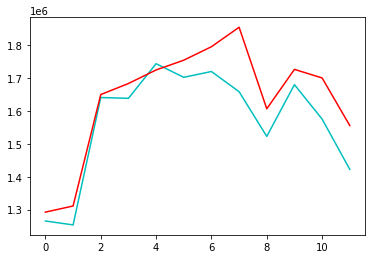

In [88]:
plt.plot(reagan11,"c")
plt.plot(reagan12,"r")

In [ ]:
#Nation's triathlon 11/09/2011
#Fancy food show 17-19/06/2011
#WH correspondents' 28/04/2011
#AIPAC and CPAC conferences 9-11/02 and 04-06/03
#Black caucus 21-24/09
#Campus pregress 26/03
#Cherry blosson 26/03-10/04


In [89]:
daily.describe()

,instant,year,month,day,workingday,holiday,temp,ftemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.00000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,15.738714,0.683995,0.035568,15.60643,14.943639,63.458413,23.978933,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,8.809949,0.465233,0.185337,9.15724,10.587347,14.043071,8.383923,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,-6.20000,-10.800000,19.000000,9.000000,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,8.000000,0.000000,0.000000,7.80000,6.050000,53.050000,17.600000,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,16.000000,1.000000,0.000000,15.70000,15.700000,63.300000,22.600000,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,23.000000,1.000000,0.000000,23.55000,23.700000,73.350000,28.700000,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,31.000000,1.000000,1.000000,33.80000,39.600000,98.300000,64.600000,3410.000000,6946.000000,8714.000000
